In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [225]:
Actual_vs_Forecasted_dat = pd.read_csv('Actual_vs_Forecasted.csv')

In [226]:
Actual_vs_Forecasted_dat.dtypes

Unnamed: 0                 int64
Location Site Name        object
Date                      object
Power_4_Hour_Forecast    float64
Day_Ahead_Forecast       float64
PV                        object
Actual_Power             float64
Capacity                  object
dtype: object

In [227]:
Actual_vs_Forecasted_dat.head()

,Unnamed: 0,Location Site Name,Date,Power_4_Hour_Forecast,Day_Ahead_Forecast,PV,Actual_Power,Capacity
0,0,Bethel Array,2020-05-04 08:00:00,29.0,4.6,Utility Scale PV,259.4,52MW
1,1,Bethel Array,2020-05-04 09:00:00,36.1,14.1,Utility Scale PV,342.8,52MW
2,2,Bethel Array,2020-05-04 10:00:00,31.3,2.6,Utility Scale PV,428.7,52MW
3,3,Bethel Array,2020-05-04 11:00:00,35.8,31.7,Utility Scale PV,398.3,52MW
4,4,Bethel Array,2020-05-04 12:00:00,35.3,25.2,Utility Scale PV,228.0,52MW


__Delete unused column and sort by location__

In [228]:
Actual_vs_Forecasted_dat = Actual_vs_Forecasted_dat.sort_values(
    by = ['Location Site Name','Date']).reset_index(drop = True)

In [229]:
Actual_vs_Forecasted_dat.head()

,Unnamed: 0,Location Site Name,Date,Power_4_Hour_Forecast,Day_Ahead_Forecast,PV,Actual_Power,Capacity
0,258,Aaron's Creek Array,2020-01-01 00:00:00,0.0,0.0,Distribution PV,0.0,17MW
1,259,Aaron's Creek Array,2020-01-01 01:00:00,0.0,0.0,Distribution PV,0.0,17MW
2,260,Aaron's Creek Array,2020-01-01 02:00:00,0.0,0.0,Distribution PV,0.0,17MW
3,261,Aaron's Creek Array,2020-01-01 03:00:00,0.0,0.0,Distribution PV,0.0,17MW
4,262,Aaron's Creek Array,2020-01-01 04:00:00,0.0,0.0,Distribution PV,0.0,17MW


In [230]:
Actual_vs_Forecasted_dat['Date'] = pd.to_datetime(Actual_vs_Forecasted_dat['Date'])

In [231]:
#Actual_vs_Forecasted_dat['Month'] = Actual_vs_Forecasted_dat['Date'].dt.month
#Actual_vs_Forecasted_dat['Day'] = Actual_vs_Forecasted_dat['Date'].dt.day
#Actual_vs_Forecasted_dat['Hour'] = Actual_vs_Forecasted_dat['Date'].dt.hour

In [232]:
Actual_vs_Forecasted_dat.head()

,Unnamed: 0,Location Site Name,Date,Power_4_Hour_Forecast,Day_Ahead_Forecast,PV,Actual_Power,Capacity
0,258,Aaron's Creek Array,2020-01-01 00:00:00,0.0,0.0,Distribution PV,0.0,17MW
1,259,Aaron's Creek Array,2020-01-01 01:00:00,0.0,0.0,Distribution PV,0.0,17MW
2,260,Aaron's Creek Array,2020-01-01 02:00:00,0.0,0.0,Distribution PV,0.0,17MW
3,261,Aaron's Creek Array,2020-01-01 03:00:00,0.0,0.0,Distribution PV,0.0,17MW
4,262,Aaron's Creek Array,2020-01-01 04:00:00,0.0,0.0,Distribution PV,0.0,17MW


In [233]:
Actual_vs_Forecasted_dat = Actual_vs_Forecasted_dat.drop(['Unnamed: 0'], axis = 1)

In [234]:
list(Actual_vs_Forecasted_dat)

['Location Site Name',
 'Date',
 'Power_4_Hour_Forecast',
 'Day_Ahead_Forecast',
 'PV',
 'Actual_Power',
 'Capacity']

__Group my data using the groupby function to sum up values from every hour for each day and keep them with their corresponding month.__

In [235]:
 grouped_dat = Actual_vs_Forecasted_dat.groupby(['Location Site Name', 'PV', 'Capacity',
                                  Actual_vs_Forecasted_dat['Date'].dt.month, 
                                  Actual_vs_Forecasted_dat['Date'].dt.day]).agg({'Actual_Power':np.sum,
                                                                                'Power_4_Hour_Forecast':np.sum,
                                                                                'Day_Ahead_Forecast':np.sum})

In [236]:
#grouped_dat = Actual_vs_Forecasted_dat.groupby([Actual_vs_Forecasted_dat['Location Site Name'], Actual_vs_Forecasted_dat['PV'],
#                                  Actual_vs_Forecasted_dat['Capacity'],
#                                  Actual_vs_Forecasted_dat['Date'].dt.month, 
#                                  Actual_vs_Forecasted_dat['Date'].dt.day]).mean()

In [237]:
grouped_dat.head(13)

Actual_Power   
Location Site Name  PV              Capacity Date Date                 
Aaron's Creek Array Distribution PV 17MW     1    1            444.5  \
                                                  2            254.6   
                                                  3             72.8   
                                                  4            520.9   
                                                  5            124.7   
                                                  6            251.2   
                                                  7            479.9   
                                                  8            545.0   
                                                  9            604.9   
                                                  10           413.2   
                                                  11           403.0   
                                                  12           692.3   
                                                  13           536.7   

                                                        Power_4_Hour_Forecast   
Location Site Name  PV              Capacity Date Date                          
Aaron's Creek Array Distribution PV 17MW     1    1                       0.0  \
                                                  2                      18.0   
                                                  3                       8.3   
                                                  4                      33.9   
                                                  5                       9.2   
                                                  6                      21.8   
                                                  7                      36.8   
                                                  8                      42.2   
                                                  9                      56.5   
                                                  10                     45.7   
                                                  11                     39.8   
                                                  12                     50.0   
                                                  13                     52.5   

                                                        Day_Ahead_Forecast  
Location Site Name  PV              Capacity Date Date                      
Aaron's Creek Array Distribution PV 17MW     1    1                   28.8  
                                                  2                   23.0  
                                                  3                    0.8  
                                                  4                   48.8  
                                                  5                   18.1  
                                                  6                   35.5  
                                                  7                   45.5  
                                                  8                   25.1  
                                                  9                   40.0  
                                                  10                  29.8  
                                                  11                  43.2  
                                                  12                  53.7  
                                                  13                  33.9

In [238]:
grouped_dat = grouped_dat.reset_index(level = [0])
#grouped_dat = grouped_dat.drop(['Date'], axis = 1)
grouped_dat = grouped_dat.reset_index(level = [3])

In [239]:
grouped_dat.head(13)

Date   Location Site Name  Actual_Power   
PV              Capacity Date                                            
Distribution PV 17MW     1        1  Aaron's Creek Array         444.5  \
                         1        2  Aaron's Creek Array         254.6   
                         1        3  Aaron's Creek Array          72.8   
                         1        4  Aaron's Creek Array         520.9   
                         1        5  Aaron's Creek Array         124.7   
                         1        6  Aaron's Creek Array         251.2   
                         1        7  Aaron's Creek Array         479.9   
                         1        8  Aaron's Creek Array         545.0   
                         1        9  Aaron's Creek Array         604.9   
                         1       10  Aaron's Creek Array         413.2   
                         1       11  Aaron's Creek Array         403.0   
                         1       12  Aaron's Creek Array         692.3   
                         1       13  Aaron's Creek Array         536.7   

                               Power_4_Hour_Forecast  Day_Ahead_Forecast  
PV              Capacity Date                                             
Distribution PV 17MW     1                       0.0                28.8  
                         1                      18.0                23.0  
                         1                       8.3                 0.8  
                         1                      33.9                48.8  
                         1                       9.2                18.1  
                         1                      21.8                35.5  
                         1                      36.8                45.5  
                         1                      42.2                25.1  
                         1                      56.5                40.0  
                         1                      45.7                29.8  
                         1                      39.8                43.2  
                         1                      50.0                53.7  
                         1                      52.5                33.9

__The data is aggregated and the format of the dataframe makes it easy to subset__

In [240]:
grouped_dat = grouped_dat.rename(columns = {'Date' : 'Day'})
grouped_dat = grouped_dat.reset_index()
grouped_dat = grouped_dat.rename(columns = {'Date' : 'Month'})
grouped_dat.head(13)

,PV,Capacity,Month,Day,Location Site Name,Actual_Power,Power_4_Hour_Forecast,Day_Ahead_Forecast
0,Distribution PV,17MW,1,1,Aaron's Creek Array,444.5,0.0,28.8
1,Distribution PV,17MW,1,2,Aaron's Creek Array,254.6,18.0,23.0
2,Distribution PV,17MW,1,3,Aaron's Creek Array,72.8,8.3,0.8
3,Distribution PV,17MW,1,4,Aaron's Creek Array,520.9,33.9,48.8
4,Distribution PV,17MW,1,5,Aaron's Creek Array,124.7,9.2,18.1
5,Distribution PV,17MW,1,6,Aaron's Creek Array,251.2,21.8,35.5
6,Distribution PV,17MW,1,7,Aaron's Creek Array,479.9,36.8,45.5
7,Distribution PV,17MW,1,8,Aaron's Creek Array,545.0,42.2,25.1
8,Distribution PV,17MW,1,9,Aaron's Creek Array,604.9,56.5,40.0
9,Distribution PV,17MW,1,10,Aaron's Creek Array,413.2,45.7,29.8


__An example of subsetting the first month of data from the loaction Aaron's Creek Array and plotting the data.__

In [241]:
Aaron_array = grouped_dat[grouped_dat['Location Site Name'] == "Aaron's Creek Array"]

In [242]:
Aaron_array_jan = Aaron_array[Aaron_array['Month'] == 1]

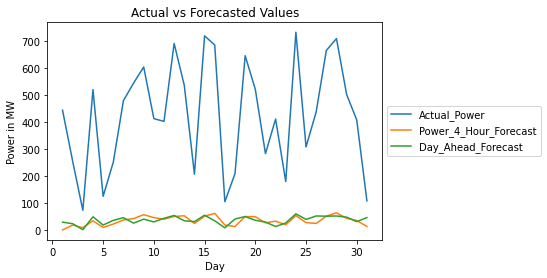

In [247]:
Aaron_array_jan.plot(x = 'Day', y = ['Actual_Power', 'Power_4_Hour_Forecast', 'Day_Ahead_Forecast'],
                   kind = 'line', title = 'Actual vs Forecasted Values', ylabel = 'Power in MW')
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.show()

__Code below is to doulbe check the data has been aggregated correctly by checking values without using the groupby function__

In [244]:
Aaron_Array = Actual_vs_Forecasted_dat[Actual_vs_Forecasted_dat["Location Site Name"] == "Aaron's Creek Array"]
print(Aaron_Array.head())
Aaron_Array_Subset = Aaron_Array[(Aaron_Array['Date'] >= '2020-01-01 00:00:00')
                                      & (Aaron_Array['Date'] < '2020-01-02 00:00:00')] 
print(Aaron_Array_Subset['Actual_Power'].sum())

    Location Site Name                Date  Power_4_Hour_Forecast   
0  Aaron's Creek Array 2020-01-01 00:00:00                    0.0  \
1  Aaron's Creek Array 2020-01-01 01:00:00                    0.0   
2  Aaron's Creek Array 2020-01-01 02:00:00                    0.0   
3  Aaron's Creek Array 2020-01-01 03:00:00                    0.0   
4  Aaron's Creek Array 2020-01-01 04:00:00                    0.0   

   Day_Ahead_Forecast               PV  Actual_Power Capacity  
0                 0.0  Distribution PV           0.0     17MW  
1                 0.0  Distribution PV           0.0     17MW  
2                 0.0  Distribution PV           0.0     17MW  
3                 0.0  Distribution PV           0.0     17MW  
4                 0.0  Distribution PV           0.0     17MW  
444.5
